In [113]:
import utils
import copy
import os
import numpy as np

import importlib
importlib.reload(utils)
utils.task_names_

['add', 'sub', 'max', 'first', 'rand', 'even', 'a2b', 'a2abb2', 'a3ab']

In [114]:
task_names=['add', 'rand', 'even', 'a2b', 'a3ab',"a2abb2"]

In [115]:
default_config={
    "experiment_directory":"./data/experiments/default/",
    "seed":0,
    "dataset_params":{
        "base_path":"./data/datasets/",
        "n_max":31,
        "seq_len":6,
        "task_names":["even","add","rand"],
        "train_frac":0.5,
        "sampling_method":"random",
        "sampling_kwargs":{"temp":1.0},
    },
    "training_params":{
        "n_steps":100_000,
        "batch_size":128,
        "save_steps":[10,100,1_000,10_000,100_000],
        "ckpt_steps":[],
    },
    "model_params":{
        "lr":0.001,
        "weight_decay":1.0,
        "betas":[0.9,0.98],
        "network_params":{
            "n_layer":2,
            "n_head":4,
            "n_embd":128,
            "dropout":0.0,
            "bias":False
            }
    }
}

In [8]:
def get_sqrt_steps(start,end,n):
    steps=(np.linspace(np.sqrt(start),np.sqrt(end),n)**2).astype(int)
    steps[-1]=end
    steps=np.unique(steps)
    return steps.tolist()

In [9]:
n_steps=100_000
save_steps=get_sqrt_steps(start=10,end=n_steps,n=100)

singles

In [124]:
fol_name="singles"
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["save_steps"]=save_steps
        config_["training_params"]["ckpt_steps"]=[n_steps]

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [67]:
fol_name="singles_bs=64"
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

add+one task

In [40]:
fol_name="addp1"
for task_name in task_names:
    if task_name=="add":
        continue
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name,"add"]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [117]:
fol_name="addp1_sampaddfirst"
for task_name in task_names:
    if task_name=="add":
        continue
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name,"add"]
        config_["dataset_params"]["sampling_method"]="add_first"
        config_["dataset_params"]["sampling_kwargs"]={"temp":0.2}
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [118]:
fol_name="addp1_sampaddfirst2"
for task_name in task_names:
    if task_name=="add":
        continue
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name,"add"]
        config_["dataset_params"]["sampling_method"]="add_first"
        config_["dataset_params"]["sampling_kwargs"]={"temp":1.0}
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [41]:
fol_name="addp1_bs=256"
for task_name in task_names:
    if task_name=="add":
        continue
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name,"add"]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=256
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [138]:
fol_name="add_ft"
for task_name in task_names:
    if task_name=="add":
        continue
    for seed in range(3):
        fol=f"./yamls/base/{fol_name}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(default_config)
        config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name,"add"]
        config_["dataset_params"]["sampling_method"]="add_last"
        config_["dataset_params"]["sampling_kwargs"]={"temp":1e-3}
        config_["model_params"]["ckpt_path"]=f"./data/experiments/base/singles/add_seed=0/ckpts/ckpt_step=100000.pth"
        #low lr
        config_["model_params"]["lr"]=1e-5
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

all 6 tasks

In [11]:
fol_name="all_bs=128"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=task_names
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [68]:
fol_name="all_bs=128_long"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=task_names
    config_["training_params"]["n_steps"]=6*100_000
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=get_sqrt_steps(start=10,end=6*100_000,n=100)

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [15]:
fol_name="all_bs=128_long_wide"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=task_names
    config_["model_params"]["network_params"]["n_embd"]=512
    config_["training_params"]["n_steps"]=6*100_000
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=get_sqrt_steps(start=10,end=6*100_000,n=100)

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [16]:
fol_name="all_bs=128_long_ntr=0.65"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=task_names
    config_["dataset_params"]["train_frac"]=0.65
    config_["training_params"]["n_steps"]=6*100_000
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=get_sqrt_steps(start=10,end=6*100_000,n=100)

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [12]:
fol_name="all_bs=768"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=task_names
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=768
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

no even

In [12]:
no_even_tasks=['add', 'rand', 'a2b', 'a3ab',"a2abb2"]

In [13]:
fol_name="noeven_bs=128"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=no_even_tasks
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [14]:
fol_name="noeven_bs=640"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=no_even_tasks
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=640
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [64]:
add_a2b_a2abb2=['add', 'a2b',"a2abb2"]

In [65]:
fol_name="add^a2b^a2abb2_bs=128"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=add_a2b_a2abb2
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=128
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [66]:
fol_name="add^a2b^a2abb2_bs=384"
for seed in range(3):
    fol=f"./yamls/base/{fol_name}/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(default_config)
    config_["experiment_directory"]=f"./data/experiments/base/{fol_name}/seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=add_a2b_a2abb2
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=384
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"all_seed={seed}.yaml"))

In [61]:
128*3

384

In [44]:
import torch
import torch.nn.functional as F

In [58]:
x1=torch.randn(4,3)
x2=x1.clone()
x1.requires_grad=True

In [59]:
ce1=F.cross_entropy(x1,torch.tensor([0,1,2,0]))
ce1.backward()
x1.grad

tensor([[-0.0917,  0.0270,  0.0647],
        [ 0.0301, -0.1699,  0.1398],
        [ 0.1749,  0.0470, -0.2219],
        [-0.0278,  0.0182,  0.0095]])

In [60]:
sm=F.softmax(x2,dim=-1)
sm.requires_grad=True
ce2=F.mse_loss(sm,torch.tensor([[1.,0,0],[0,1,0],[0,0,1],[1,0,0]]))
ce2.backward()
sm.grad*3/2

tensor([[-0.0917,  0.0270,  0.0647],
        [ 0.0301, -0.1699,  0.1398],
        [ 0.1749,  0.0470, -0.2219],
        [-0.0278,  0.0182,  0.0095]])

In [7]:
task_names

['add', 'rand', 'even', 'a2b', 'a3ab', 'a2abb2']

In [42]:
config_=copy.deepcopy(utils.default_config)
config_["experiment_directory"]="./data/experiments/default/"
config_["seed"]=0
config_["training_params"]["n_steps"]=n_steps
config_["training_params"]["save_steps"]=save_steps
utils.write_config(config_,"./yamls/default.yaml")

singles

In [75]:
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_bs=64/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_bs=64/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [ ]:
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [69]:
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_bs=256/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_bs=256/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=256
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [51]:
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_bs=512/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_bs=512/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=512
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [ ]:
#batch 256
#names
#['add', 'sub', 'max', 'first', 'rand', 'even', 'a2b', 'a2abb2', 'a3ab']
#possible
#[yes,  yes ,   yes ,   yes ,   no  ,   yes  , yes ,   yes    , yes  ]
#n_step learned
#[5e2,  1e3,    6e1,     8e1,     inf, 3e2, 2e3, [3e2,3e4], inf]
#grok
#[yes, yes,     no,    no,     no,     yes,  yes,    yes,   yes]


Sub+Add

In [57]:
#sub+add -> exploring adding two groks.
#same batch (will reduce batch size per task)
for seed in range(3):
    fol=f"./yamls/sub^add_bs=256/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/sub^add_bs=256/sub^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['sub','add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=256
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"sub^add_seed={seed}.yaml"))

In [ ]:
#sub+add -> exploring adding two groks.
#2x batch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/sub^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/sub^add_bs=512/sub^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['sub','add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"sub^add_seed={seed}.yaml"))

Many

In [59]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/sub^rand^even^a2b^a2abb2^a3ab_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/sub^rand^even^a2b^a2abb2^a3ab_bs=512/sub^rand^even^a2b^a2abb2^a3ab_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['sub', 'rand', 'even', 'a2b', 'a2abb2', 'a3ab']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"sub^rand^even^a2b^a2abb2^a3ab_seed={seed}.yaml"))

Many2

In [60]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/max^rand^even^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/max^rand^even^add_bs=512/max^rand^even^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['max', 'rand', 'even', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"max^rand^even^add_seed={seed}.yaml"))

Many3

In [74]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/max^even^add^a2b^rand_bs=640/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/max^even^add^a2b^rand_bs=640/max^even^add^a2b^rand_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['max', 'even', 'add', 'a2b', 'rand']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=640
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"max^even^add^a2b^rand_seed={seed}.yaml"))

a2b + add

In [61]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/a2b^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a2b^add_bs=512/a2b^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a2b', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a2b^add_seed={seed}.yaml"))

In [70]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/a2b^add_bs=256/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a2b^add_bs=256/a2b^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a2b', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=256
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a2b^add_seed={seed}.yaml"))

max+add

In [62]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/max^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/max^add_bs=512/max^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['max', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"max^add_seed={seed}.yaml"))

a3ab+ add

In [63]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/a3ab^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a3ab^add_bs=512/a3ab^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a3ab', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a3ab^add_seed={seed}.yaml"))

rand+ add

In [67]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/rand^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/rand^add_bs=512/rand^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['rand', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"rand^add_seed={seed}.yaml"))

a2abb2+add

In [68]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/a2abb2^add_bs=512/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a2abb2^add_bs=512/a2abb2^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a2abb2', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=512
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a2abb2^add_seed={seed}.yaml"))

In [71]:
for seed in range(3):
    fol=f"./yamls/a2abb2^add_bs=256/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a2abb2^add_bs=256/a2abb2^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a2abb2', 'add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=256
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a2abb2^add_seed={seed}.yaml"))

a3ab+sub+add

In [66]:
#2xbatch (will maintain batch size per task)
for seed in range(3):
    fol=f"./yamls/a3ab^sub^add_bs=768/"
    if not os.path.exists(fol):
        os.makedirs(fol)

    config_=copy.deepcopy(utils.default_config)
    config_["experiment_directory"]=f"./data/experiments/a3ab^sub^add_bs=768/a3ab^sub^add_seed={seed}/"
    config_["seed"]=seed
    config_["dataset_params"]["task_names"]=['a3ab', 'sub','add']
    config_["training_params"]["n_steps"]=n_steps
    config_["training_params"]["batch_size"]=768
    config_["training_params"]["save_steps"]=save_steps

    utils.write_config(config_,os.path.join(fol,f"a3ab^sub^add_seed={seed}.yaml"))

Model changes

In [80]:
# init at 1
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_md1_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_md1_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["model_params"]["network_params"]["kwargs"]={"init_scale":1.0}
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [83]:
#2layer
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_md2_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_md2_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [84]:
#small 0.01 weight decay
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_md3_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_md3_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["model_params"]["weight_decay"]=0.01
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

data

In [87]:
#train_frac 0.35
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_da1_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_da1_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.35
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [88]:
#train_frac 0.65
for task_name in utils.task_names_:
    for seed in range(3):
        fol=f"./yamls/singles_da2_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_da2_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.65
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

full change

In [89]:
task_names=["even","add","a2b","a3ab","rand"]

In [90]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc1_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc1_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.4
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [91]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc1_bs=64/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc1_bs=64/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.4
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [92]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc2_bs=64/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc2_bs=64/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=71
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.4
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [5]:
task_names=["add"]

In [6]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc3_bs=64/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc3_bs=64/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=71
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.3
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [7]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc3_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc3_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=71
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.3
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [25]:
task_names=["add","a2b"]

In [27]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc4_bs=64/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc4_bs=64/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=31
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.4
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [26]:
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/singles_fc4_bs=128/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/singles_fc4_bs=128/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=31
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.4
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [28]:
folname="singles_fc5_bs=64"
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/{folname}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/{folname}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=31
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.5
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [29]:
folname="singles_fc5_bs=128"
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/{folname}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/{folname}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=31
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.5
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=128
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [30]:
folname="singles_fc6_bs=64"
for task_name in task_names:
    for seed in range(3):
        fol=f"./yamls/{folname}/seed={seed}/"
        if not os.path.exists(fol):
            os.makedirs(fol)

        config_=copy.deepcopy(utils.default_config)
        config_["experiment_directory"]=f"./data/experiments/{folname}/{task_name}_seed={seed}/"
        config_["seed"]=seed
        config_["dataset_params"]["n_max"]=53
        config_["dataset_params"]["task_names"]=[task_name]
        config_["dataset_params"]["train_frac"]=0.5
        config_["model_params"]["network_params"]["n_layer"]=2
        config_["training_params"]["n_steps"]=n_steps
        config_["training_params"]["batch_size"]=64
        config_["training_params"]["save_steps"]=save_steps

        utils.write_config(config_,os.path.join(fol,f"{task_name}.yaml"))

In [18]:
import torch
import matplotlib.pyplot as plt
results=torch.load("./data/experiments/singles_fc3_bs=128/add_seed=0/results.pth")
results.keys()
save_steps=results["save_steps"]
train_accs=results["train_accs"]
val_accs=results["val_accs"]

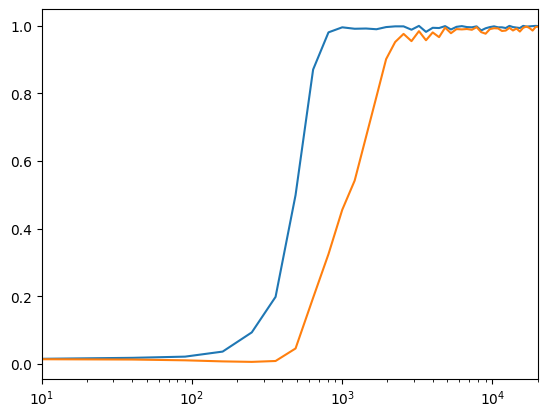

In [21]:
plt.plot(save_steps,train_accs["add"])
plt.plot(save_steps,val_accs["add"])
plt.xlim(10,20000)
plt.xscale("log")